**ODEs**

\begin{aligned}&\frac{dx}{dt}=2x+3y\\&\frac{dy}{dt}=-4y.\end{aligned}
$$x(0)=0\\y(0)=1$$


$$\begin{aligned}&x(t)=\frac{1}{2}e^{2t}-\frac{1}{2}e^{-4t}\\&y(t)=e^{-4t}.\end{aligned}$$

In [17]:
import numpy as np
from scipy.integrate import odeint
from Multistep_NN import Multistep_NN
from plotting import newfig, savefig
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import torch


def source_fun_1(t):
    return 0.5*np.exp(2*t) - 0.5*np.exp(-4*t)

def source_fun_2(t):
    return np.exp(-4*t)


if __name__ == "__main__": 
    
    # function that returns dx/dt
    def f(x,t): # x is 2 x 1
        A = np.array([[2,3], [0,-4]]) # 2 x 2
        f = np.matmul(A,x[:,None]) # 2 x 1
        return f.flatten()
    
    # time points
    t_star = np.arange(0,10,0.01)
    
    # initial condition
    x0 = np.array([0,1])
    
    # solve ODE
    X_star = odeint(f, x0, t_star)
    
    noise = 0

    skip = 1
    dt = t_star[skip] - t_star[0]
    X_train = X_star[0::skip,:]
    X_train = X_train + noise*X_train.std(0)*np.random.randn(X_train.shape[0], X_train.shape[1])
    
    X_train = np.reshape(X_train, (1,X_train.shape[0],X_train.shape[1]))
    layers = [2, 128, 2]
    
    M = 1
    scheme = 'AM'
    model = Multistep_NN(dt, X_train, layers, M, scheme)
    N_Iter = 5000
    model.train_model(N_Iter)
    def learned_f(x,t):
        f = model.predict_f(x[None,:])
        return f.flatten()
    
    # learned_X_star = odeint(learned_f, x0, t_star)    


Epoch 1/5000, Train_loss:  2.8296832614400000e+11
Epoch 1001/5000, Train_loss:  2.8296816230400000e+11
Epoch 2001/5000, Train_loss:  2.8296799846400000e+11
Epoch 3001/5000, Train_loss:  2.8296780185600000e+11
Epoch 4001/5000, Train_loss:  2.8296753971200000e+11


In [18]:
test_steps = 1000
test_np = np.linspace(0,10, test_steps)
test_np_new = torch.linspace(0, 10, test_steps)
# t_span = (0, 1.5)

learned_X_star = odeint(learned_f, x0, test_np)    

<function matplotlib.pyplot.show(close=None, block=None)>

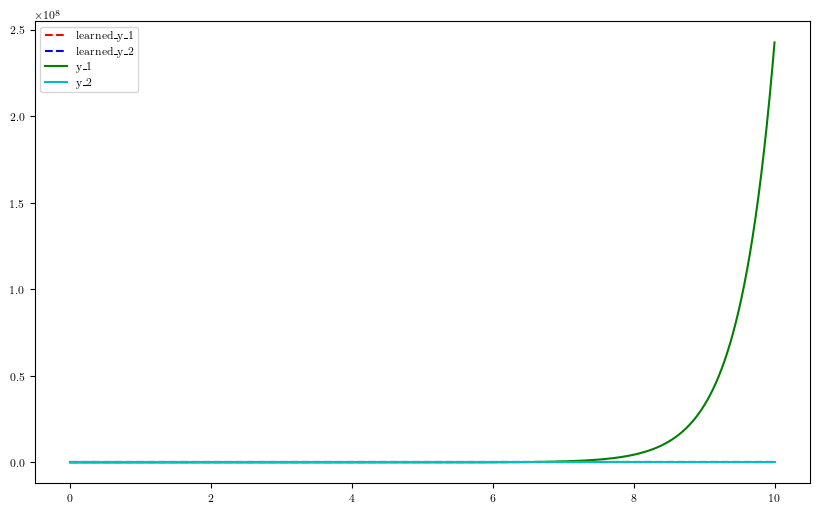

In [19]:
####### Plotting ################## 
#source_fun_1 = lambda t: 0.5*torch.exp(2*t) - 0.5*torch.exp(-4*t)
#source_fun_2 = lambda t: torch.exp(-4*t) 

plt.figure(figsize=(10, 6))
plt.plot(test_np, learned_X_star[:,0], label='learned_y_1',linestyle='--', color='r')
plt.plot(test_np, learned_X_star[:,1], label='learned_y_2',linestyle='--', color='b')
plt.plot(test_np, source_fun_1(test_np), label='y_1', color='g')
plt.plot(test_np, source_fun_2(test_np), label='y_2', color='c')

plt.legend()
plt.show

Text(0.5, 1.0, 'Phase Portrait')

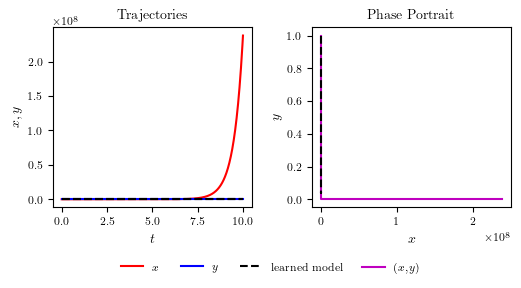

In [20]:
####### Plotting ################## 
fig, ax = newfig(1.0, 0.9)
ax.axis('off')

gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=0.85, bottom=0.25, left=0.1, right=0.95, wspace=0.3)

ax = plt.subplot(gs0[:, 0:1])
ax.plot(t_star,X_star[:,0],'r',label='$x$')
ax.plot(t_star,X_star[:,1],'b',label='$y$')
ax.plot(t_star,learned_X_star[:,0],'k--',label='learned model')
ax.plot(t_star,learned_X_star[:,1],'k--')    
ax.set_xlabel('$t$')
ax.set_ylabel('$x, y$')
ax.legend(loc='upper center', bbox_to_anchor=(0.9, -0.25), ncol=3, frameon=False)
ax.set_title('Trajectories', fontsize = 10)

ax = plt.subplot(gs0[:, 1:2])
ax.plot(X_star[:,0],X_star[:,1], 'm', label='$(x,y)$')
ax.plot(learned_X_star[:,0],learned_X_star[:,1],'k--')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='upper center', bbox_to_anchor=(0.4, -0.25), ncol=1, frameon=False)
ax.set_title('Phase Portrait', fontsize = 10)

# savefig('./figures/ODEs')

In [21]:
l_inf_NN_y1 = np.max(np.abs(learned_X_star[:,0]-source_fun_1(t_star)))
l_inf_NN_y2 = np.max(np.abs(learned_X_star[:,1]-source_fun_2(t_star)))
l_inf_odeint_y1 = np.max(np.abs(X_star[:,0]-source_fun_1(t_star)))
l_inf_odeint_y2 = np.max(np.abs(X_star[:,1]-source_fun_2(t_star)))
print(f'网络解y1的L∞ 范数: {l_inf_NN_y1}')
print(f'网络解y2的L∞ 范数: {l_inf_NN_y2}')
print(f'多步法解y1的L∞ 范数: {l_inf_odeint_y1}')
print(f'多步法解y2的L∞ 范数: {l_inf_odeint_y2}')

网络解y1的L∞ 范数: 237773605.49437073
网络解y2的L∞ 范数: 0.15417314010461716
多步法解y1的L∞ 范数: 69.97760462760925
多步法解y2的L∞ 范数: 2.8970436383168874e-08
